In [1]:
import tensorflow as tf
from tensorflow import keras

2025-02-05 20:43:28.377571: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-05 20:43:28.405110: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-05 20:43:28.405130: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-05 20:43:28.405887: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-05 20:43:28.410573: I tensorflow/core/platform/cpu_feature_guar

In [2]:
# Loading the dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

In [4]:
y_train_full.shape

(60000,)

In [5]:
# Normalize the pixel values to the range (0, 1)
X_valid, X_train, = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
X_test = X_test / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
class_names[y_train[0]]

'Coat'

In [8]:
# Building the neural network
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential

model = Sequential([
    Flatten(input_shape=[28, 28]),
    Dense(300, activation="relu"),
    Dense(100, activation="relu"),
    Dense(10, activation="softmax"),
])


2025-02-05 20:43:30.201667: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-02-05 20:43:30.221539: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [11]:
weights, biases = hidden1.get_weights()

In [12]:
weights

array([[-1.8832050e-02, -1.3440080e-02, -5.3663127e-02, ...,
         5.4298446e-02,  3.4466088e-02, -6.8537861e-02],
       [-7.1226172e-02,  6.5299660e-02,  1.0046504e-02, ...,
        -6.1642997e-02,  8.6906999e-03,  1.1981048e-02],
       [-7.0780031e-02, -5.8641896e-02, -3.3106659e-02, ...,
         1.9389391e-04,  6.0080960e-02,  5.8620274e-02],
       ...,
       [ 6.4560995e-02, -4.2956010e-02, -1.6791664e-02, ...,
         5.0011024e-02, -1.4739271e-02,  3.7336320e-02],
       [-4.2892560e-02, -2.3152139e-02,  3.8393266e-02, ...,
         1.6533434e-03,  3.1214386e-02, -3.2000244e-05],
       [-2.0956706e-02,  1.5634693e-02,  1.8555410e-02, ...,
         1.5673041e-04,  4.6498097e-02, -6.4580649e-02]], dtype=float32)

In [13]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [14]:
weights.shape, biases.shape

((784, 300), (300,))

In [15]:
# Compiling the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [16]:
# Training the model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7199 - accuracy: 0.7630 - val_loss: 0.5153 - val_accuracy: 0.8260
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4887 - accuracy: 0.8301 - val_loss: 0.4515 - val_accuracy: 0.8488
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4441 - accuracy: 0.8442 - val_loss: 0.4380 - val_accuracy: 0.8522
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4172 - accuracy: 0.8539 - val_loss: 0.4027 - val_accuracy: 0.8614
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3980 - accuracy: 0.8602 - val_loss: 0.4014 - val_accuracy: 0.8622
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3813 - accuracy: 0.8659 - val_loss: 0.3716 - val_accuracy: 0.8710
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3684 - accuracy: 0.8706 - val_loss: 0.3704 - val_accuracy:

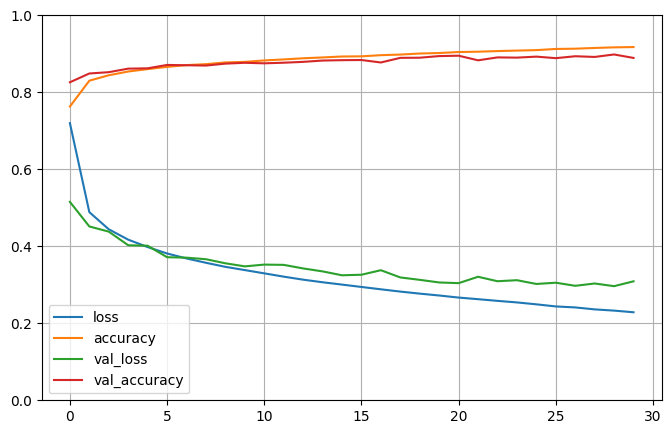

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [21]:
# Evaluating the model
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 662us/step - loss: 0.3333 - accuracy: 0.8809


[0.33333176374435425, 0.8809000253677368]

In [22]:
# Using the model to make predictions
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)


1/1 [==============================] - 0s 42ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [26]:
import numpy as np

y_pred = np.argmax(model.predict(X_new), axis=1)
y_pred

np.array(class_names)[y_pred]


1/1 [==============================] - 0s 11ms/step


array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [27]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)